In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 9c3e939 Python-3.8.13 torch-1.11.0+cu102 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11020MiB)


Setup complete ✅ (16 CPUs, 31.0 GB RAM, 374.9/900.0 GB disk)


In [3]:
cur_model_name = 'YOLOv5_Car/yolov5m_relu6'
cur_model = f'/home/umit/models/{cur_model_name}/weights/best.pt'
cur_img_dir = '/home/umit/git/image_models/dataset_51/datasets/OIDv6/validation/data'
cur_project = f'/home/umit/expt/SD-680/{cur_model_name}'
#!python detect.py --weights {cur_model} --img 640 --conf 0.25 --source {cur_img_dir} --project {cur_project} --save-txt --save-conf --save-crop --hide-label

In [4]:
cur_set = 'train'
cur_img_dir = f'/home/umit/git/image_models/dataset_51/datasets/OIDv6/{cur_set}/data'
cur_project = f'/home/umit/expt/SD-680/{cur_model_name}/{cur_set}'
cmd = f'python detect.py --weights {cur_model} --img 640 --conf 0.25 --source {cur_img_dir} --project {cur_project} --save-txt --save-conf --save-crop'
print(cmd)

python detect.py --weights /home/umit/models/YOLOv5_Car/yolov5m_relu6/weights/best.pt --img 640 --conf 0.25 --source /home/umit/git/image_models/dataset_51/datasets/OIDv6/train/data --project /home/umit/expt/SD-680/YOLOv5_Car/yolov5m_relu6/train --save-txt --save-conf --save-crop


In [12]:
cur_model_name = 'YOLOv5_LP/yolov5m_relu6'
cur_model = f'/home/umit/models/{cur_model_name}/weights/best.pt'
cur_img_dir = '/home/umit/git/image_models/dataset_51/exported_dataset/Car-Vehicle_registration_plate-/images/validation'
cur_project = f'/home/umit/expt/SD-680/{cur_model_name}/validation'
cmd = f'python detect.py --weights {cur_model} --img 640 --conf 0.25 --source {cur_img_dir} --project {cur_project} --save-txt --save-conf --save-crop'
print(cmd)

python detect.py --weights /home/umit/models/YOLOv5_LP/yolov5m_relu6/weights/best.pt --img 640 --conf 0.25 --source /home/umit/git/image_models/dataset_51/exported_dataset/Car-Vehicle_registration_plate-/images/validation --project /home/umit/expt/SD-680/YOLOv5_LP/yolov5m_relu6/validation --save-txt --save-conf --save-crop


In [14]:
cur_set = 'train'
cur_img_dir = f'/home/umit/git/image_models/dataset_51/exported_dataset/Car-Vehicle_registration_plate-/images/train'
cur_project = f'/home/umit/expt/SD-680/{cur_model_name}/{cur_set}'
cmd = f'python detect.py --weights {cur_model} --img 640 --conf 0.25 --source {cur_img_dir} --project {cur_project} --save-txt --save-conf --save-crop' # --hide-labels'
print(cmd)


python detect.py --weights /home/umit/models/YOLOv5_LP/yolov5m_relu6/weights/best.pt --img 640 --conf 0.25 --source /home/umit/git/image_models/dataset_51/exported_dataset/Car-Vehicle_registration_plate-/images/train --project /home/umit/expt/SD-680/YOLOv5_LP/yolov5m_relu6/train --save-txt --save-conf --save-crop


Text(0.5, 1.0, 'LP Confidences')

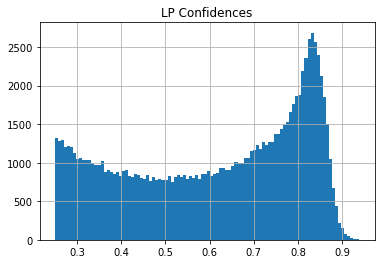

In [6]:
import numpy as np
from matplotlib import pyplot as plt
# collect all confidences
#cat /home/umit/expt/SD-680/YOLOv5_LP/yolov5m_relu6/train/exp2/labels/*.txt | awk '{print $6}' > /home/umit/expt/SD-680/YOLOv5_LP/yolov5m_relu6/train/exp2/labels/all.conf
# load them
train_conf = np.loadtxt('/home/umit/expt/SD-680/YOLOv5_LP/yolov5m_relu6/train/exp2/labels/all.conf')
plt.hist(train_conf, 100)
plt.grid()
plt.title('LP Confidences')

Text(0.5, 1.0, 'Car Confidences')

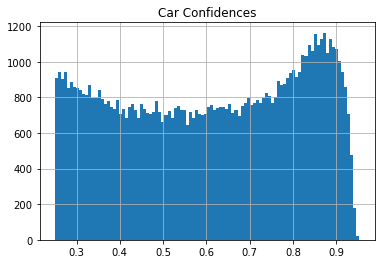

In [10]:
train_conf = np.loadtxt('/home/umit/expt/SD-680/YOLOv5_Car/yolov5m_relu6/train/exp/labels/all.conf')
plt.hist(train_conf, 100)
plt.grid()
plt.title('Car Confidences')

# Merge all detections to create a new set of labels

In [32]:
import os, glob
set_name = 'train'
ref_img_dir = f'/home/umit/git/image_models/dataset_51/exported_dataset/Car-Vehicle_registration_plate-/images/{set_name}'
car_model_name = 'YOLOv5_Car/yolov5m_relu6'
lp_model_name = 'YOLOv5_LP/yolov5m_relu6'
lp_predictions = f'/home/umit/expt/SD-680/{lp_model_name}/{set_name}/exp/labels'
car_predictions = f'/home/umit/expt/SD-680/{car_model_name}/{set_name}/exp/labels'
merged_predictions = f'/home/umit/expt/SD-680/CAR_LP_merged/{set_name}'
if not os.path.isdir(merged_predictions):
    os.makedirs(merged_predictions)

img_files = glob.glob(f'{ref_img_dir}/*.jpg')

for img_file in img_files:
    image_name = os.path.splitext(os.path.basename(img_file))[0]    
    lp_pred_file = os.path.join(lp_predictions,image_name+'.txt')
    car_pred_file = os.path.join(car_predictions,image_name+'.txt')
    merged_pred_file = os.path.join(merged_predictions,image_name+'.txt') 
    # car is class 0, lp is class 1
    with open(merged_pred_file, 'w') as outfile:
        print(merged_pred_file)
        if os.path.isfile(car_pred_file):
            with open(car_pred_file) as infile:
                outfile.write(infile.read())
        if os.path.isfile(lp_pred_file):
            with open(lp_pred_file) as infile:
                for line in infile.readlines():
                    aug_line = ['1'] + line.split()[1:]
                    #aug_line = ' '.join(['1'.append(line.split()[1:]])
                    outfile.write(' '.join(aug_line)+'\n')
                
        

/home/umit/expt/SD-680/CAR_LP_merged/train/954eff13d5115067.txt


# Merge existing transcriptions with LP detections


In [1]:
# For any LP detection with > 0.5 confidence, we will add this to the labels and then do NMS on them.
import fiftyone as fo

# A name for the dataset
name = "my-dataset"

# The directory containing the dataset to import
dataset_dir = "/path/to/dataset"

# The type of the dataset being imported
dataset_type = fo.types.  # for example

dataset = fo.Dataset.from_dir(
    dataset_dir=dataset_dir,
    dataset_type=dataset_type,
    name=name,
)

SyntaxError: invalid syntax (3836085289.py, line 11)

In [ ]:
import torch
from torchvision.ops import nms


boxes = torch.tensor([[190,380,(190+300),(380+150)],
                      [300,420,(300+150),(420+210)],
                      [320,360,(320+200),(360+230)],

                      [390,50,(390+300),(50+330)],
                      [490,45,(490+200),(45+500)],
                      [480,130,(480+150),(130+400)]], dtype=torch.float32)

scores = torch.tensor([[0.90],[0.98],[0.82], [0.87],[0.98],[0.82]], dtype=torch.float32)

nms(boxes = boxes, scores = scores, iou_threshold=0.2)

In [ ]:
image = plt.imread('index.jpg')

# draw emtpy figure
fig = plt.figure()

# define axis
ax = fig.add_axes([0, 0, 1, 1])

# plot image
plt.imshow(image)
      
# create rectangular patch
#dog
rect_0 = patches.Rectangle((190, 380), 300, 150, edgecolor='red', facecolor='none', linewidth=2)
rect_1 = patches.Rectangle((300, 420), 150, 210, edgecolor='green', facecolor='none', linewidth=2)
rect_2 = patches.Rectangle((320, 360), 200, 230, edgecolor='blue', facecolor='none', linewidth=2)

#person
rect_3 = patches.Rectangle((390, 50), 300, 330, edgecolor='red', facecolor='none', linewidth=2)
rect_4 = patches.Rectangle((490, 45), 200, 500, edgecolor='green', facecolor='none', linewidth=2)
rect_5 = patches.Rectangle((480, 130),150,400, edgecolor='blue', facecolor='none', linewidth=2)

In [12]:
def yolo_to_pascal_voc(x_center, y_center, w, h,  image_w, image_h):
    w = w * image_w
    h = h * image_h
    x1 = ((2 * x_center * image_w) - w)/2
    y1 = ((2 * y_center * image_h) - h)/2
    x2 = x1 + w
    y2 = y1 + h
    return [x1, y1, x2, y2]

In [2]:
import cv2, random, os
def plot_one_box(x, image, color=None, label=None, line_thickness=None):
    # Plots one bounding box on image img
    tl = line_thickness or round(0.002 * (image.shape[0] + image.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(image, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(label, 0, fontScale=tl / 3, thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(image, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image, label, (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)

def draw_box_on_image(image_name, classes, colors, label_folder, raw_images_folder):
    txt_path  = os.path.join(label_folder,'%s.txt'%(image_name))  #本次检测结果txt路径
    if image_name == '.DS_Store':
        return 0
    image_path = os.path.join( raw_images_folder,'%s.jpg'%(image_name))  #本次原始图片jpg路径
    
    #save_file_path = os.path.join(save_images_folder,'%s.jpg'%(image_name)) #本次保存图片jpg路径
    
    # flag_people_or_car_data = 0  #变量 代表类别
    source_file = open(txt_path)
    image = cv2.imread(image_path)
    try:
        height, width, channels = image.shape
    except:
        print('no shape info.')
        return 0

    for line in source_file: #例遍 txt文件得每一行
        staff = line.split() #对每行内容 通过以空格为分隔符对字符串进行切片
        class_idx = int(staff[0])

        x_center, y_center, w, h = float(staff[1])*width, float(staff[2])*height, float(staff[3])*width, float(staff[4])*height
        x1 = round(x_center-w/2)
        y1 = round(y_center-h/2)
        x2 = round(x_center+w/2)
        y2 = round(y_center+h/2)  
        cur_label =   classes[class_idx] 
        if len(staff)>5:
            cur_label = classes[class_idx]+'-%.2f'%float(staff[5])
        plot_one_box([x1,y1,x2,y2], image, color=colors[class_idx], label=cur_label, line_thickness=None)

        #cv2.imwrite(save_file_path,image) 

    return image


In [ ]:
import glob, os
import matplotlib.pyplot as plt
plt.ion()
%matplotlib inline
from time import sleep
classes = ['CAR','LP']
colors = [[random.randint(0, 255) for _ in range(3)] for _ in range(len(classes))]
cur_img_dir = '/home/umit/git/image_models/dataset_51/exported_dataset/Car-Vehicle_registration_plate-/images/train'
cur_lbl_dir = '/home/umit/git/image_models/dataset_51/exported_dataset/Car-Vehicle_registration_plate-/labels/train'
car_det_dir = '/home/umit/expt/SD-680/YOLOv5_Car/yolov5m_relu6/train/exp/labels'
lp_det_dir = '/home/umit/expt/SD-680/YOLOv5_LP/yolov5m_relu6/train/exp2/labels'
all_files = glob.glob(f'{cur_img_dir}/*.jpg')
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
axim1 = ax1.imshow([0,0,0])
axim2 = ax2.imshow([0,0,0])
for file in all_files[:250]:
    image_name = os.path.splitext(os.path.basename(file))[0]
    im1 = draw_box_on_image(image_name, classes, colors, cur_lbl_dir, cur_img_dir)
    #im_car, _ = draw_box_on_image(image_name, classes, colors, car_det_dir, cur_img_dir)
    axim1.set_data(im1)

    if os.path.isfile(f'{lp_det_dir}/{image_name}.txt'):
        im_lp = draw_box_on_image(image_name, classes[1], colors[1], lp_det_dir, cur_img_dir)
        #plt.figure(figsize=(10,10))
        #ax2.imshow(im_lp)
        axim2.set_data(im_lp)
        #print(im1)
    
    plt.show()
    fig.clear()
    #ax1.clear()
    #ax2.clear()
    sleep(2.0)
    #plt.pause(5.)
    #plt.waitforbuttonpress(timeout=2)
    #input("Enter")
    #plt.close()
    

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - Scalar value for argument 'color' is longer than 4
>  - Scalar value for argument 'color' is longer than 4
>  - argument for rectangle() given by name ('thickness') and position (4)
>  - argument for rectangle() given by name ('thickness') and position (4)


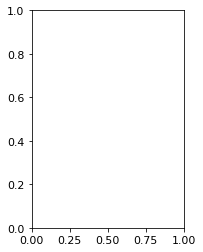

In [46]:
# Now try to do merging with label files


import matplotlib.patches as patches
import glob, os
import numpy as np
from PIL import Image
from utils.plots import Annotator


classes = {0:'CAR',1:'LP'}
colors = {0:0, 1:1}

#colors = [random.randint(0, 255) for _ in range(len(segments))]
line_thickness=4

cur_img_dir = '/home/umit/git/image_models/dataset_51/exported_dataset/Car-Vehicle_registration_plate-/images/train'
car_det_dir = '/home/umit/expt/SD-680/YOLOv5_Car/yolov5m_relu6/train/exp/labels'
lp_det_dir = '/home/umit/expt/SD-680/YOLOv5_LP/yolov5m_relu6/train/exp2/labels'
all_files = glob.glob(f'{cur_img_dir}/*.jpg')
for file in all_files[3:10]:
    image = plt.imread(file)
    image_h, image_w, _ = image.shape

    # draw emtpy figure
    fig = plt.subplot(121)#figure()
    # define axis
    #ax = fig.add_axes([0, 0, 1, 1])
    # plot image
  
    lbl_file = file.replace('images','labels').replace('.jpg','.txt')
    lp_det_file = os.path.join(lp_det_dir,os.path.basename(lbl_file))
    car_det_file = os.path.join(car_det_dir,os.path.basename(lbl_file))
    with open(lbl_file) as file:
        segments = [line.rstrip() for line in file]
        colors = [random.randint(0, 255) for _ in range(len(segments))]
        for segment in segments:
            staff = segment.split()
            class_idx = int(staff[0])
            x_center, y_center, w, h = float(staff[1])*image_w, float(staff[2])*image_h, float(staff[3])*image_w, float(staff[4])*image_h
            x1 = round(x_center-w/2)
            y1 = round(y_center-h/2)
            x2 = round(x_center+w/2)
            y2 = round(y_center+h/2)     
        
            plot_one_box([x1,y1,x2,y2], image, color=colors, label=classes[class_idx], line_thickness=None)
    plt.imshow(image)

    fig = plt.subplot(122)
    # define axis
    #ax = fig.add_axes([0, 0, 1, 1])
    with open(lp_det_file) as file:
        segments = [line.rstrip() for line in file]
        colors = [random.randint(0, 255) for _ in range(len(segments))]
        for segment in segments:
            staff = segment.split()
            class_idx = int(staff[0])+1
            conf_lbl = classes[class_idx]+'%.2f'%float(staff[-1])
            x_center, y_center, w, h = float(staff[1])*image_w, float(staff[2])*image_h, float(staff[3])*image_w, float(staff[4])*image_h
            x1 = round(x_center-w/2)
            y1 = round(y_center-h/2)
            x2 = round(x_center+w/2)
            y2 = round(y_center+h/2)     
        
            plot_one_box([x1,y1,x2,y2], image, color=colors, label=conf_lbl, line_thickness=None)
    with open(car_det_file) as file:
        segments = [line.rstrip() for line in file]
        colors = [random.randint(0, 255) for _ in range(len(segments))]
        for segment in segments:
            staff = segment.split()
            class_idx = int(staff[0])
            conf_lbl = classes[class_idx]+'%.2f'%float(staff[-1])
            x_center, y_center, w, h = float(staff[1])*image_w, float(staff[2])*image_h, float(staff[3])*image_w, float(staff[4])*image_h
            x1 = round(x_center-w/2)
            y1 = round(y_center-h/2)
            x2 = round(x_center+w/2)
            y2 = round(y_center+h/2)     
        
            plot_one_box([x1,y1,x2,y2], image, color=colors, label=conf_lbl, line_thickness=None)

        
    plt.imshow(image)
'''
            [cur_class, x_center, y_center, width, height]=segment.split()
            boxes = yolo_to_pascal_voc(float(x_center), float(y_center), float(width), float(height), image_w, image_h)
            annotator.box_label(boxes, label=str(cur_class))
    im0 = annotator.result()
    plt.imshow(im0)
    plt.show()
    print(segments)
    with open(det_file) as file:
        det_segments = [line.rstrip() for line in file]
    print(det_segments)
    #input("Press Enter")
    '''

    

In [3]:
# YOLOv5 CI
%%shell
rm -rf runs  # remove runs/
m=yolov5n  # official weights
b=runs/train/exp/weights/best  # best.pt checkpoint
python train.py --imgsz 64 --batch 32 --weights $m.pt --cfg $m.yaml --epochs 1 --device 0  # train
for d in 0 cpu; do  # devices
  for w in $m $b; do  # weights
    python val.py --imgsz 64 --batch 32 --weights $w.pt --device $d  # val
    python detect.py --imgsz 64 --weights $w.pt --device $d  # detect
  done
done
python hubconf.py --model $m  # hub
python models/tf.py --weights $m.pt  # build TF model
python models/yolo.py --cfg $m.yaml  # build PyTorch model
python export.py --weights $m.pt --img 64 --include torchscript  # export

SyntaxError: invalid syntax (3026153189.py, line 3)

In [ ]:
# Reproduce
for x in (f'yolov5{x}' for x in 'nsmlx'):
  !python val.py --weights {x}.pt --data coco.yaml --img 640 --task speed  # speed
  !python val.py --weights {x}.pt --data coco.yaml --img 640 --conf 0.001 --iou 0.65  # mAP

In [ ]:
# Profile
from utils.torch_utils import profile

m1 = lambda x: x * torch.sigmoid(x)
m2 = torch.nn.SiLU()
results = profile(input=torch.randn(16, 3, 640, 640), ops=[m1, m2], n=100)

In [ ]:
# VOC
for b, m in zip([64, 64, 64, 32, 16], [f'yolov5{x}' for x in 'nsmlx']):  # batch, model
  !python train.py --batch {b} --weights {m}.pt --data VOC.yaml --epochs 50 --img 512 --hyp hyp.VOC.yaml --project VOC --name {m} --cache

In [ ]:
# Classification train
for m in [*(f'yolov5{x}-cls.pt' for x in 'nsmlx'), 'resnet50.pt', 'resnet101.pt', 'efficientnet_b0.pt', 'efficientnet_b1.pt']:
  for d in 'mnist', 'fashion-mnist', 'cifar10', 'cifar100', 'imagenette160', 'imagenette320', 'imagenette', 'imagewoof160', 'imagewoof320', 'imagewoof':
    !python classify/train.py --model {m} --data {d} --epochs 10 --project YOLOv5-cls --name {m}-{d}

In [ ]:
# Classification val
!bash data/scripts/get_imagenet.sh --val  # download ImageNet val split (6.3G - 50000 images)
!python classify/val.py --weights yolov5m-cls.pt --data ../datasets/imagenet --img 224  # validate

In [ ]:
# Validate on COCO test. Zip results.json and submit to eval server at https://competitions.codalab.org/competitions/20794
!bash data/scripts/get_coco.sh --test  # download COCO test-dev2017 (7G - 40000 images, test 20000)
!python val.py --weights yolov5x.pt --data coco.yaml --img 640 --iou 0.65 --half --task test

In [ ]:
# TensorRT 
!pip install -U nvidia-tensorrt --index-url https://pypi.ngc.nvidia.com  # install
!python export.py --weights yolov5s.pt --include engine --imgsz 640 --device 0  # export
!python detect.py --weights yolov5s.engine --imgsz 640 --device 0  # inference